In [66]:
# Changement de dossier
import os
os.chdir(r"C:\Users\crede\Downloads\python") 

# Chargement des individus actifs
import pandas as pd
XAct = pd.read_excel("acp.xlsx", sheet_name="AUTOS.ACTIVES", index_col=0)

In [67]:
# Infos sur les données
XAct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, SANTA FE to C3
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   puissance  30 non-null     int64
 1   cylindree  30 non-null     int64
 2   vitesse    30 non-null     int64
 3   longueur   30 non-null     int64
 4   largeur    30 non-null     int64
 5   hauteur    30 non-null     int64
 6   poids      30 non-null     int64
dtypes: int64(7)
memory usage: 1.9+ KB


In [68]:
# Statistiques descriptives
XAct.describe()

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,132.566667,1805.266667,192.966667,428.466667,175.766667,151.066667,1316.900000
std,44.894269,571.476004,20.342724,38.840730,8.783540,11.581595,312.607537
min,70.000000,1197.000000,155.000000,366.000000,150.000000,141.000000,945.000000
25%,98.000000,1398.000000,180.000000,394.750000,169.250000,145.000000,1063.750000
50%,127.500000,1598.000000,192.500000,428.500000,177.500000,146.000000,1262.500000
75%,150.000000,2110.250000,204.500000,460.000000,181.000000,151.000000,1523.750000
max,234.000000,3498.000000,250.000000,489.000000,194.000000,186.000000,2260.000000


In [9]:
#classe de calculs
from fanalysis.pca import PCA

#demander une acp normée 
acp = PCA(std_unit=True,stats=True,col_labels=XAct.columns,row_labels=XAct.index)

#acp a partir de la matrice numpy

acp.fit(XAct.values)

PCA(col_labels=Index(['puissance', 'cylindree', 'vitesse', 'longueur', 'largeur', 'hauteur',
       'poids'],
      dtype='object'),
    row_labels=Index([  'SANTA FE',     'MURANO',    'LANDCRU',    'OUTLAND',    'X-TRAIL',
         'CITRONC5',   'VELSATIS',     'LAGUNA',  'CITROENC2',       'CLIO',
            'MODUS',     'BMW530',     'MERC-E',     'INDICA', 'PEUGEOT206',
           'VECTRA',   'ALFA 156',     'AUDIA3',     'MEGANE',          308,
         'GOLF VII',       'LEON',      'CORSA',      'YARIS',      'FOCUS',
             'POLO',      'SWIFT',      'MICRA',      'ASTRA',         'C3'],
      dtype='object', name='Modèle'))

In [10]:
#affichage des valeurs propres
acp.eig_

array([[5.00308442e+00, 1.30419322e+00, 3.59477729e-01, 1.53020961e-01,
        1.01089198e-01, 5.12355757e-02, 2.78988961e-02],
       [7.14726345e+01, 1.86313318e+01, 5.13539613e+00, 2.18601373e+00,
        1.44413140e+00, 7.31936796e-01, 3.98555658e-01],
       [7.14726345e+01, 9.01039663e+01, 9.52393624e+01, 9.74253761e+01,
        9.88695075e+01, 9.96014443e+01, 1.00000000e+02]])

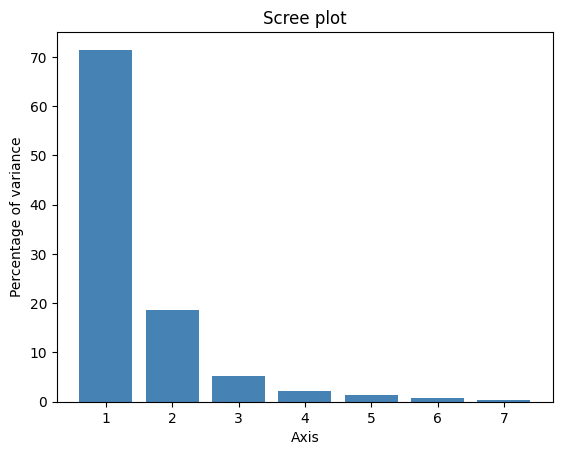

In [11]:
#outils des valeurs.p (variance expliquée)
acp.plot_eigenvalues(type='percentage')

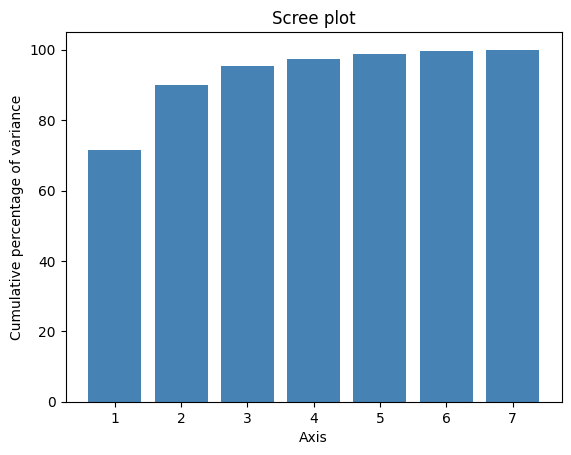

In [12]:
#outils des valeurs.p (variance expliquée) cumulative
acp.plot_eigenvalues(type='cumulative')

Informations sur les variables

In [14]:
#informations sur les variables
info_var = acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7',
       'col_contrib_dim1', 'col_contrib_dim2', 'col_contrib_dim3',
       'col_contrib_dim4', 'col_contrib_dim5', 'col_contrib_dim6',
       'col_contrib_dim7', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4', 'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7'],
      dtype='object')

In [16]:
#coordonnées des var. correlations avec les axes
info_var[['col_coord_dim1','col_coord_dim2']]

,col_coord_dim1,col_coord_dim2
puissance,-0.961390,-0.098635
cylindree,-0.918009,0.095016
vitesse,-0.664608,-0.703685
longueur,-0.937284,-0.157027
largeur,-0.878264,-0.052601
hauteur,-0.505807,0.833089
poids,-0.942699,0.262301


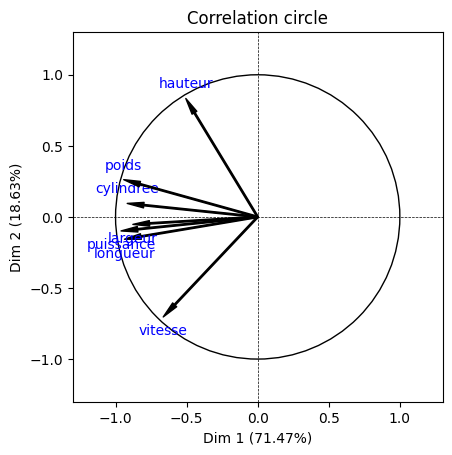

In [17]:
#cercle de correlation 
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

In [18]:
#contribution des variables
info_var[['col_contrib_dim1','col_contrib_dim2']]

,col_contrib_dim1,col_contrib_dim2
puissance,18.474034,0.745972
cylindree,16.844412,0.692229
vitesse,8.828628,37.967739
longueur,17.559180,1.890641
largeur,15.417426,0.212151
hauteur,5.113665,53.215854
poids,17.762655,5.275415


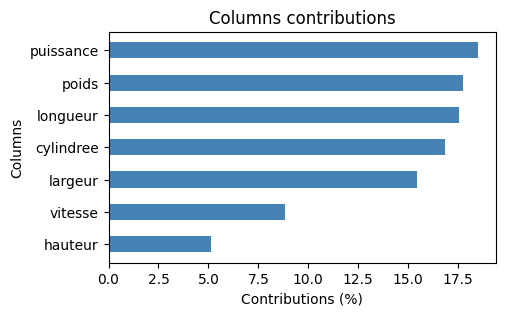

In [19]:
#forme graphique et ordonnée
acp.plot_col_contrib(num_axis=1,figsize=(5,3))

In [21]:
#cos2
info_var[['col_cos2_dim1','col_cos2_dim2']]

,col_cos2_dim1,col_cos2_dim2
puissance,0.924272,0.009729
cylindree,0.842740,0.009028
vitesse,0.441704,0.495173
longueur,0.878501,0.024658
largeur,0.771347,0.002767
hauteur,0.255841,0.694038
poids,0.888681,0.068802


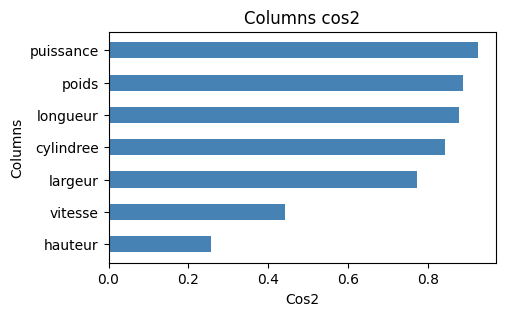

In [22]:
#graphique 
acp.plot_col_cos2(num_axis=1,figsize=(5,3))

In [23]:
#cumul pour les deux premiers axes
info_var[['col_cos2_dim1','col_cos2_dim2']].cumsum(axis=1)

,col_cos2_dim1,col_cos2_dim2
puissance,0.924272,0.934000
cylindree,0.842740,0.851768
vitesse,0.441704,0.936876
longueur,0.878501,0.903158
largeur,0.771347,0.774114
hauteur,0.255841,0.949879
poids,0.888681,0.957482


Informations sur les individus 

In [25]:
#coordonées et autres infos
info_indiv = acp.row_topandas()
info_indiv.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7',
       'row_contrib_dim1', 'row_contrib_dim2', 'row_contrib_dim3',
       'row_contrib_dim4', 'row_contrib_dim5', 'row_contrib_dim6',
       'row_contrib_dim7', 'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3',
       'row_cos2_dim4', 'row_cos2_dim5', 'row_cos2_dim6', 'row_cos2_dim7'],
      dtype='object')

In [26]:
#coordonnées sur les plans
info_indiv[['row_coord_dim1','row_coord_dim2']]

,row_coord_dim1,row_coord_dim2
Modèle,,
SANTA FE,-2.153019,1.630403
MURANO,-4.707287,0.917430
LANDCRU,-4.694166,3.369556
OUTLAND,-2.213323,0.990252
X-TRAIL,-1.076984,2.080575
CITRONC5,-1.397103,-0.853318
VELSATIS,-2.537080,-0.902583
LAGUNA,-0.477115,-0.734210
CITROENC2,2.009985,-0.108575


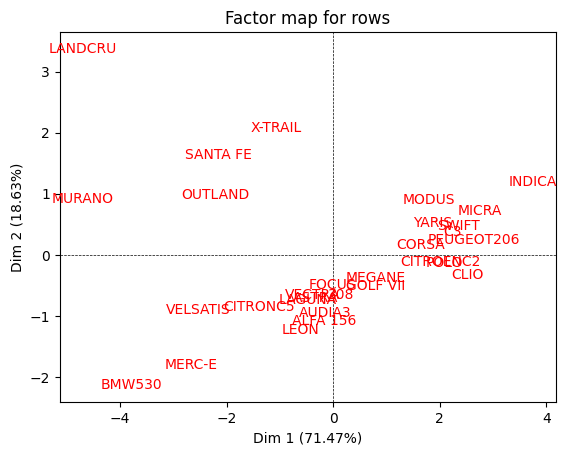

In [34]:
#carte graphique
acp.mapping_row(num_x_axis=1,num_y_axis=2)

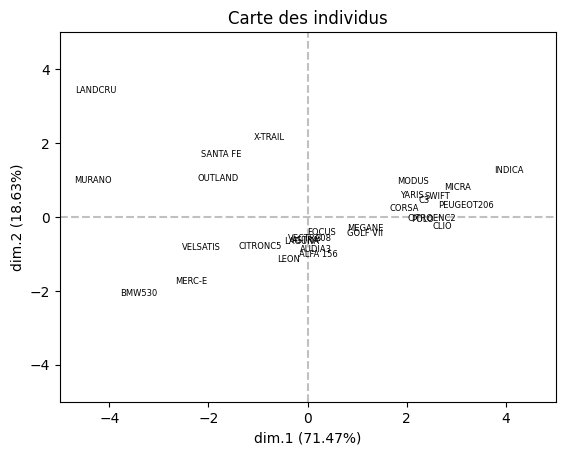

In [69]:
#coordonnées dans le plan
coord = info_indiv[['row_coord_dim1','row_coord_dim2']]

#pour ne pas etre trompé par la mise en à l'echelle auto du graphe
import matplotlib.pyplot as plt
axe = plt.gca()

#delimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='silver',linestyle='--')
axe.set_xlabel('dim.1 (71.47%)')
axe.set_ylabel('dim.2 (18.63%)')
plt.title('Carte des individus')
for i in range(coord.shape[0]):
    axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()

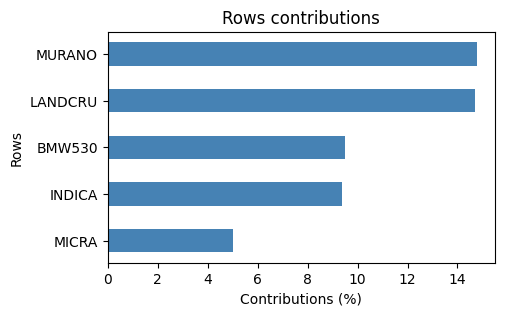

In [71]:
#contribution aux axes -CTR
acp.plot_row_contrib(num_axis=1,nb_values=5,figsize=(5,3))

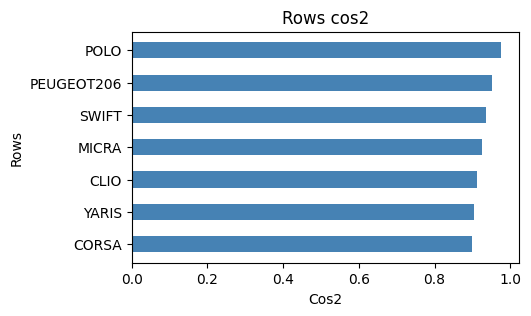

In [45]:
#qualité de representation -- cos2
acp.plot_row_cos2(num_axis=1,nb_values=7,figsize=(5,3))

In [46]:
#contribution sur les deux premiers axes
contrib = info_indiv[['row_contrib_dim1','row_contrib_dim2']]
contrib.head()

,row_contrib_dim1,row_contrib_dim2
Modèle,,
SANTA FE,3.088422,6.794022
MURANO,14.763262,2.151207
LANDCRU,14.681071,29.018974
OUTLAND,3.263854,2.506274
X-TRAIL,0.772787,11.063777


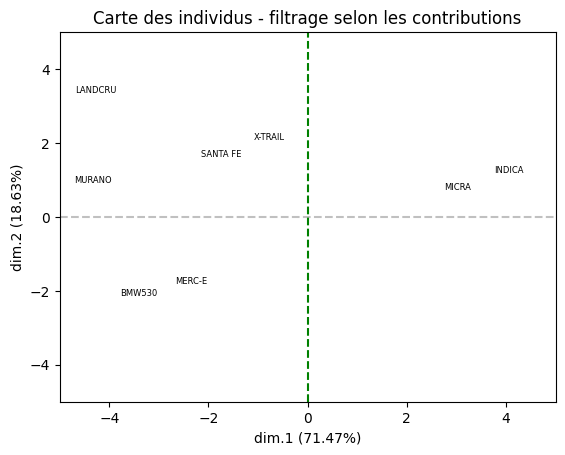

In [72]:


#graphique avec filtrage sur les contributions 
axe = plt.gca()

#delimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='green',linestyle='--')
axe.set_xlabel('dim.1 (71.47%)')
axe.set_ylabel('dim.2 (18.63%)')
plt.title('Carte des individus - filtrage selon les contributions')
for i in range(coord.shape[0]):
    if (contrib.iloc[i,0]>5.0) or (contrib.iloc[i,1]>5.0):
        axe.text(coord.iloc[i,0],coord.iloc[i,1],coord.index[i],fontsize=6)
plt.show()

Variables illustratives

In [74]:
Xillus = pd.read_excel("acp.xlsx", sheet_name="VAR.ILLUSTRATIVES", index_col=0)

Xillus

,prix,origine
Modèle,,
SANTA FE,27590,Autres
MURANO,44000,Autres
LANDCRU,67700,Autres
OUTLAND,29300,Autres
X-TRAIL,27950,Autres
CITRONC5,25300,France
VELSATIS,29950,France
LAGUNA,22550,France
CITROENC2,15300,France


In [55]:
#correlations de la variables 'prix' avec les 2 premiers facteurs

info_indiv[['row_coord_dim1','row_coord_dim2']].corrwith(Xillus.prix)

row_coord_dim1   -0.899176
row_coord_dim2    0.172386
dtype: float64

In [75]:
#copie des données 
coord = info_indiv[['row_coord_dim1','row_coord_dim2']].copy()
coord['origin']= Xillus.origine

#moyenne conditionnelles de "origine" par facteur

for j in range(2):
    print(pd.pivot_table(coord,values=coord.columns[j],index=['origin'],aggfunc='sum'),'\n')

        row_coord_dim1
origin                
Autres       -7.885902
Europe        0.151458
France        7.734444 

        row_coord_dim2
origin                
Autres       10.720525
Europe       -8.297099
France       -2.423425 



Projection des individus supplementaires

In [58]:
#chargement des individus suppelemntaires
Xsup = pd.read_excel("acp.xlsx", sheet_name="AUTOS.SUPPLEMENTAIRES", index_col=0)
Xsup

,puissance,cylindree,vitesse,longueur,largeur,hauteur,poids
Modèle,,,,,,,
P607,204,2721,230,491,184,145,1723
P407,136,1997,212,468,182,145,1415
P1007,75,1360,165,374,169,161,118


In [59]:
#calcul des coodonnées
coord_supp = acp.transform(Xsup)
coord_supp 

,0,1,2,3,4,5,6
Modèle,,,,,,,
P607,-3.411563,-1.499342,0.475863,0.440971,-0.052949,-0.054727,0.101066
P407,-1.187495,-1.055637,-0.453273,0.282640,0.015737,0.421123,0.138046
P1007,3.653325,0.880943,0.051323,-1.554206,-0.620150,1.348541,-2.040780


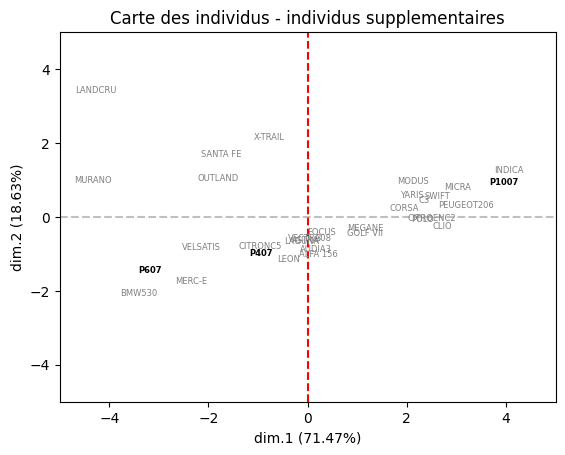

In [64]:
#place dans la carte des individus

coord = info_indiv[['row_coord_dim1','row_coord_dim2']]
#graphique avec filtrage sur les contributions 
axe = plt.gca()

#delimiter
axe.axis([-5,+5,-5,+5])
axe.plot([-5,+5],[0,0],color='silver',linestyle='--')
axe.plot([0,0],[-5,+5],color='red',linestyle='--')
axe.set_xlabel('dim.1 (71.47%)')
axe.set_ylabel('dim.2 (18.63%)')
plt.title('Carte des individus - individus supplementaires')
for i in range(coord.shape[0]):
    axe.text(coord.iloc[i, 0],             
         coord.iloc[i, 1],             
         str(coord.index[i]),          
         fontsize=6,
         color="gray")

for i in range(coord_supp.shape[0]): 
    axe.text(coord_supp.iloc[i, 0],     
             coord_supp.iloc[i, 1],     
             str(coord_supp.index[i]),  
             fontsize=6,
             fontweight='bold')